In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
import cv2

In [3]:
DIR=r'E:\DL-Project\Cse499B\Training'

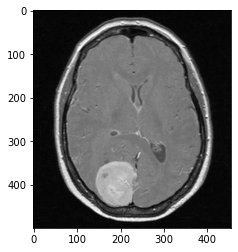

In [4]:
image1=Image.open(r'E:\DL-Project\Cse499B\Training\meningioma\Te-me_0010.jpg')
plt.imshow(image1)
plt.show()

# Data Preprocessing

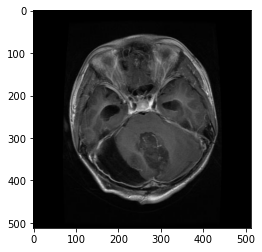

In [5]:
Train_DIR=r'E:\DL-Project\Cse499B\Training'
Categories=['glioma','meninglioma','notumor','pituitary']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

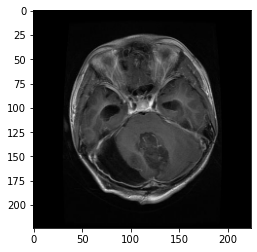

In [6]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D


In [8]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'E:\DL-Project\Cse499B\Training',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'E:\DL-Project\Cse499B\Training',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


In [9]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [10]:
checkpoint=ModelCheckpoint(r'E:\DL-Project\Cse499B\models\apple4.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [11]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=16,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
351/351 [==============================] - ETA: 0s - loss: 0.8813 - accuracy: 0.6359
Epoch 00001: val_loss improved from inf to 1.04423, saving model to E:\DL-Project\Cse499B\models\apple4.h5
351/351 [==============================] - 742s 2s/step - loss: 0.8813 - accuracy: 0.6359 - val_loss: 1.0442 - val_accuracy: 0.5970
Epoch 2/16
351/351 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.7633
Epoch 00002: val_loss improved from 1.04423 to 0.67682, saving model to E:\DL-Project\Cse499B\models\apple4.h5
351/351 [==============================] - 714s 2s/step - loss: 0.6127 - accuracy: 0.7633 - val_loss: 0.6768 - val_accuracy: 0.7500
Epoch 3/16
351/351 [==============================] - ETA: 0s - loss: 0.4833 - accuracy: 0.8235
Epoch 00003: val_loss improved from 0.67682 to 0.57745, saving model to E:\DL-Project\Cse499B\models\apple4.h5
351/351 [==============================] - 

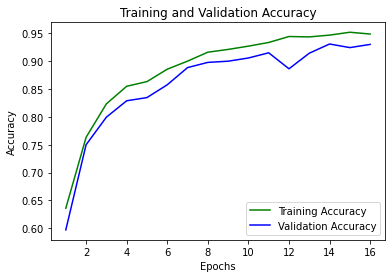

In [14]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,17)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

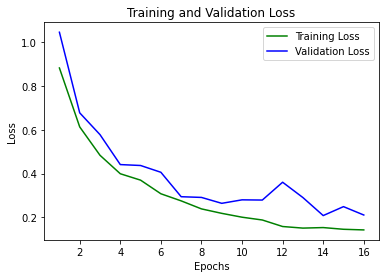

In [15]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,17)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the Prediction on a Single Image

0


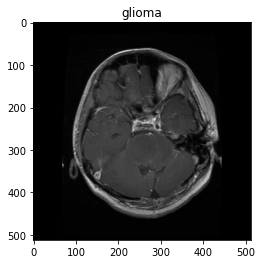

In [16]:
test_image=r'E:\DL-Project\Cse499B\Training\glioma\Te-gl_0010.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['glioma','meninglioma','notumor','pituitary']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

2


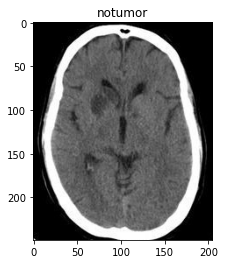

In [18]:
test_image=r'E:\DL-Project\Cse499B\Training\notumor\Te-no_0010.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['glioma','meninglioma','notumor','pituitary']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

3


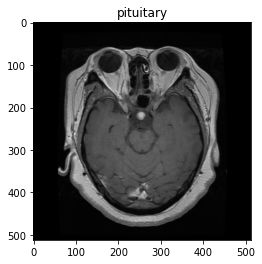

In [19]:
test_image=r'E:\DL-Project\Cse499B\Training\pituitary\Te-pi_0010.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['glioma','meninglioma','notumor','pituitary']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()